In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn import linear_model
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 26 days


## Generate toy data

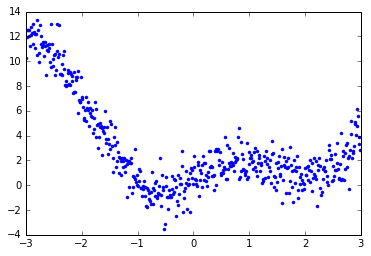

In [2]:
N = 500 # total number of data points
x = np.linspace(start = -3, stop = 3, num = N)
y_orig = .3 + -1*x + .9*x**2 + 2*np.sin(2*3.14*.3*x)
## Add white noise
y =  y_orig + 1.*np.random.randn(N)
plt.plot(x, y, '.')

## Create train, validation, test splits

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

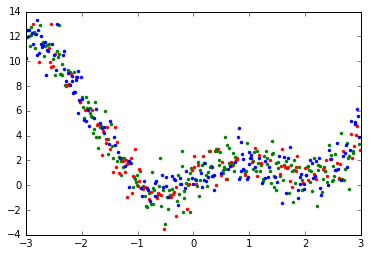

In [4]:
plt.plot(X_train, y_train, 'g.')
plt.plot(X_val, y_val, 'r.')
plt.plot(X_test, y_test, 'b.')

### SGD with random projections

In [5]:
X_hat_train = np.hstack((np.ones((X_train.shape[0],1)), X_train[:,np.newaxis]))
X_hat_val = np.hstack((np.ones((X_val.shape[0],1)), X_val[:,np.newaxis]))

In [6]:
M =50 # number of hidden nodes
## setup random weights to project data
weights = np.random.randn(M,2)

Z_train = np.tanh(np.dot(X_hat_train, weights.T))
Z_val = np.tanh(np.dot(X_hat_val, weights.T))